# 01 Preprocess ASL Alphabet Dataset

### Download the dataset from kaggle

In [1]:
import kagglehub

# Download latest version to the current directory
path = kagglehub.dataset_download("grassknoted/asl-alphabet")

print("Path to dataset files:", path)

Path to dataset files: /home/acyeow/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1


### Move the data to the current working directory

In [2]:
import shutil

src_path = "/home/acyeow/.cache/kagglehub/datasets/grassknoted/asl-alphabet/versions/1/"
dst_path = "./data"

# Copy the contents of the source directory to the destination directory
shutil.copytree(src_path, dst_path, dirs_exist_ok=True)

'./data'

### Data preprocessing

In [3]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

### Display the data

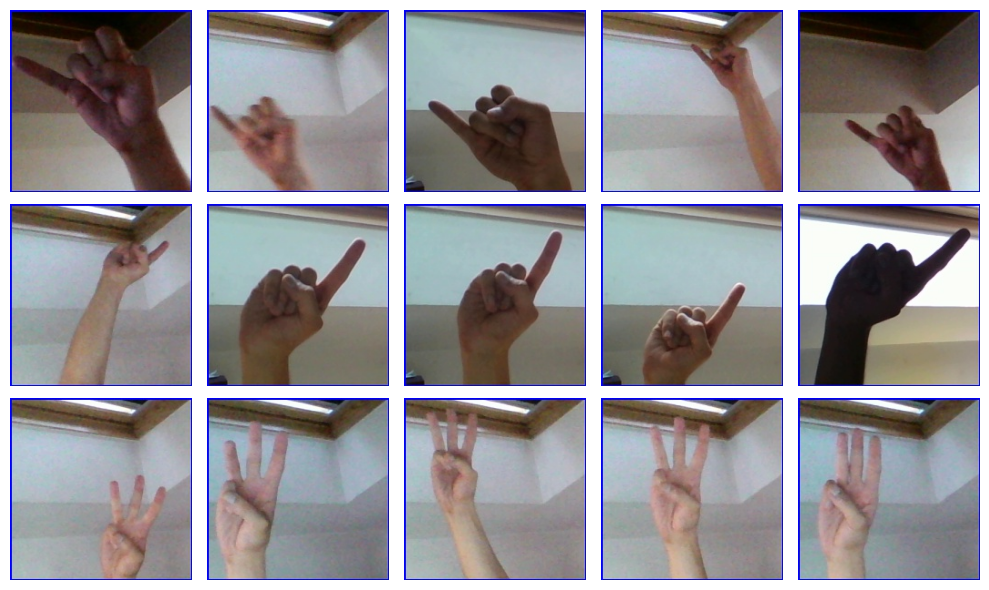

In [4]:
DATA_DIR = './data/asl_alphabet_train/asl_alphabet_train'
num_images = 5  # Number of images to display per row
image_size = (2, 2)  # Size of each image

# Get the list of directories and limit to the first 3
dirs = os.listdir(DATA_DIR)[:3]

# Create a figure with subplots
fig, axes = plt.subplots(len(dirs), num_images, figsize=(num_images * image_size[0], len(dirs) * image_size[1]))

for i, dir_ in enumerate(dirs):
    for j, img_path in enumerate(os.listdir(os.path.join(DATA_DIR, dir_))[:num_images]):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        axes[i, j].imshow(img_rbg)
        axes[i, j].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

### Run the mediapipe model to find the hand landmarks

In [5]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [6]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

I0000 00:00:1738084651.382987    3992 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1738084651.451886    4411 gl_context.cc:369] GL version: 3.0 (OpenGL ES 3.0 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: D3D12 (Intel(R) UHD Graphics)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1738084651.512600    4364 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738084651.533544    4386 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738084651.584801    4370 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


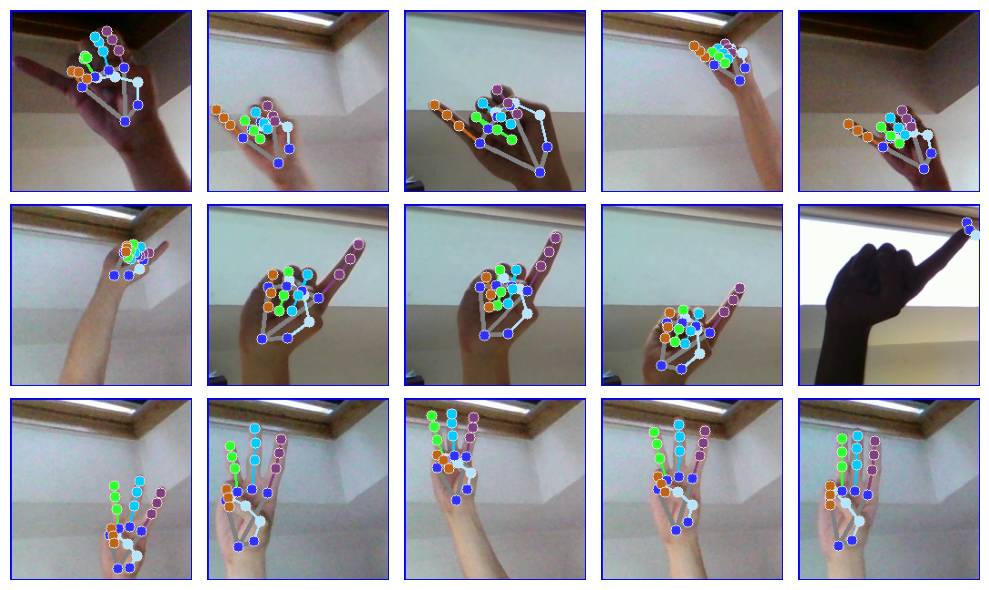

In [7]:
fig, axes = plt.subplots(len(dirs), num_images, figsize=(num_images * image_size[0], len(dirs) * image_size[1]))

for i, dir_ in enumerate(dirs):
    for j, img_path in enumerate(os.listdir(os.path.join(DATA_DIR, dir_))[:num_images]):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rbg)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rbg,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style())
                
        axes[i, j].imshow(img_rbg)
        axes[i, j].axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

### Print out the data

In [8]:
for i, dir_ in enumerate(dirs):
    for j, img_path in enumerate(os.listdir(os.path.join(DATA_DIR, dir_))[:num_images]):
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rbg)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    print(hand_landmarks.landmark[i])

x: 0.633876145
y: 0.610532522
z: 9.71024519e-07

x: 0.701965332
y: 0.521871686
z: -0.0548872612

x: 0.700415611
y: 0.397182763
z: -0.0714994743

x: 0.577483833
y: 0.365573347
z: -0.083391

x: 0.478988349
y: 0.372965068
z: -0.0971428156

x: 0.628144264
y: 0.317809671
z: -0.0301058833

x: 0.595481813
y: 0.223363861
z: -0.0571723208

x: 0.562284
y: 0.162115321
z: -0.0826605633

x: 0.531735182
y: 0.119922817
z: -0.100908346

x: 0.540244222
y: 0.331979722
z: -0.0281583518

x: 0.51151967
y: 0.229382679
z: -0.0519789904

x: 0.488736928
y: 0.176576838
z: -0.0762875602

x: 0.469477922
y: 0.148529738
z: -0.0927209407

x: 0.467402041
y: 0.367949069
z: -0.0340142958

x: 0.407972515
y: 0.268564105
z: -0.072687462

x: 0.412216246
y: 0.253481418
z: -0.0913868099

x: 0.42056191
y: 0.2606861
z: -0.0976743

x: 0.399264723
y: 0.424642205
z: -0.0441284887

x: 0.341903478
y: 0.337780058
z: -0.08090996

x: 0.375780046
y: 0.34043324
z: -0.0837284252

x: 0.420075774
y: 0.377090245
z: -0.0797906071

x: 0.39274

### Map the labels to integers for consistent label representation

In [9]:
# Create mapping for letters a-z (0-25)
char_to_num = {chr(i + 65): i for i in range(26)}

# Add special mappings
char_to_num.update({
    'del': 26,
    'nothing': 27,
    'space': 28
})

# Create reverse mapping
num_to_char = {v: k for k, v in char_to_num.items()}

# Print mappings to verify
print("Character to Number mapping:")
print(char_to_num)
print("\nNumber to Character mapping:")
print(num_to_char)

Character to Number mapping:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}

Number to Character mapping:
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}


### Build the dataset

In [10]:
import pickle
import numpy as np

In [ ]:
DATA_DIR = './data/asl_alphabet_train/asl_alphabet_train'
image_size = (2, 2)  # Size of each image

# Get the list of directories 
dirs = os.listdir(DATA_DIR)

data, labels = [], []

for i, dir_ in enumerate(dirs):
    # The dataset is too large, so we will only use the first 100 images from each class
    for j, img_path in enumerate(os.listdir(os.path.join(DATA_DIR, dir_))[:100]):
        # Create a list to store the data for each image
        data_aux = []
        img = cv2.imread(os.path.join(DATA_DIR, dir_, img_path))
        img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        results = hands.process(img_rbg)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    # Append the x and y coordinates of each landmark
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
            # Ensure that the data has all landmarks and skip if not
            if len(data_aux) != 42:
                continue
            data.append(data_aux)
            labels.append([char_to_num[dir_]])

f = open('data.pkl', 'wb')
pickle.dump({'data': data, 'labels': labels}, f)
f.close()

### Check the shape of the data and labels to ensure consistency

In [12]:
print(f'Data shape: {np.array(data).shape}')
print(f'Labels shape: {np.array(labels).shape}')

Data shape: (2201, 42)
Labels shape: (2201, 1)
